# __Microsoft COCO Vocabulary__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In this _Jupyter Notebook_, I am going to create list of _n_ most common words which occured in MSCOCO dataset captions. Those words will be used for training my model.

In [1]:
import os
os.chdir(os.environ["PYTHONPATH"])

import string

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scripts.data_loading as dl
import scripts.data_processing as dp

%matplotlib inline
%load_ext autoreload
%autoreload 2


plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["image.cmap"] = "plasma"

In [2]:
VOCABULARY_OUTPUT_PATH = os.path.join(os.getcwd(), "assets", "text", "vocabulary.csv")

coco_train = dl.CocoCaptions(dl.DATASET_PATHS[dl.DatasetType.TRAIN])

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!


In [3]:
def create_vocabulary(dset: dl.CocoCaptions) -> pd.Series:
    word_cnt = {}

    for _, caption in coco_train:
        caption = dp.TextPipeline.normalize(caption)
        tokens = caption.split()

        for token in tokens:
            if token not in word_cnt.keys():
                word_cnt[token] = 0
            word_cnt[token] += 1
            
    vocabulary = pd.Series(word_cnt)
    vocabulary.sort_values(ascending=False, inplace=True)
    vocabulary.to_csv(VOCABULARY_OUTPUT_PATH, index_label="WORD", columns="NUM_OCCURRENCE_IN_TRAIN")
    
    return vocabulary


def load_vocabulary(path: str) -> pd.Series:
    if not os.path.exists(path):
        return create_vocabulary(coco_train)
    
    return pd.read_csv(path)

In [4]:
vocabulary = load_vocabulary(VOCABULARY_OUTPUT_PATH)

In [5]:
f"Number of words: {vocabulary.shape[0]}"

'Number of words: 29455'

In [6]:
most_common = 20

print(f"{most_common} words in coco captioning train dataset")
vocabulary.head(n=most_common)

20 words in coco captioning train dataset


,WORD,NUM_OCCURRENCE_IN_TRAIN
0,a,978614
1,on,215656
2,of,204059
3,the,197758
4,in,183997
5,with,154793
6,and,140733
7,is,98182
8,man,73025
9,to,68138


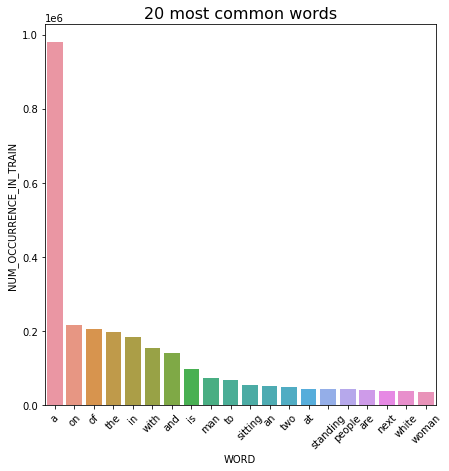

In [7]:
most_common_words = vocabulary.head(n=most_common)

plt.title(f"{most_common} most common words", fontsize=16)
words_plot = sns.barplot(x=most_common_words["WORD"], y=most_common_words["NUM_OCCURRENCE_IN_TRAIN"])
words_plot.set_xticklabels(words_plot.get_xticklabels(), rotation=45)
plt.show()

In [8]:
# Set most common to 10_000 as in "Show, Attend and Tell" paper
print("10 000 words in coco captioning train dataset")
vocabulary.head(n=most_common)

10 000 words in coco captioning train dataset


,WORD,NUM_OCCURRENCE_IN_TRAIN
0,a,978614
1,on,215656
2,of,204059
3,the,197758
4,in,183997
5,with,154793
6,and,140733
7,is,98182
8,man,73025
9,to,68138


In [9]:
VOCABULARY_TOP10K_PATH = os.path.dirname(VOCABULARY_OUTPUT_PATH)
VOCABULARY_TOP10K_PATH = os.path.join(VOCABULARY_TOP10K_PATH, "vocabulary_10k.csv")

vocabulary_10k = vocabulary.head(n=10_000)

vocabulary_10k.to_csv(VOCABULARY_TOP10K_PATH, index=False)